**Data science** 

#### Download data

In [0]:
!wget --header="Host: doc-14-80-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/uc?id=1s1v0c2iOg-RgqwCykSMPt1-HqPv_3nmr&export=download" --header="Cookie: AUTH_bbgisrjd8bh8hpacul6ehoeo57pe3ls5_nonce=6krp8ihqu12pk" --header="Connection: keep-alive" "https://doc-14-80-docs.googleusercontent.com/docs/securesc/mei7dm6hud0723bm1f9k9h0820psmb7u/edk33lvieccucmgpk7vr049gohsalmpp/1556208000000/17537862225010809205/07269277556108957290/1s1v0c2iOg-RgqwCykSMPt1-HqPv_3nmr?e=download&nonce=6krp8ihqu12pk&user=07269277556108957290&hash=oh55f8ov5oncque52suh5k9dcgpcq2f8" -O "data_science_assignment.txt" -c

--2019-04-25 17:45:28--  https://doc-14-80-docs.googleusercontent.com/docs/securesc/mei7dm6hud0723bm1f9k9h0820psmb7u/edk33lvieccucmgpk7vr049gohsalmpp/1556208000000/17537862225010809205/07269277556108957290/1s1v0c2iOg-RgqwCykSMPt1-HqPv_3nmr?e=download&nonce=6krp8ihqu12pk&user=07269277556108957290&hash=oh55f8ov5oncque52suh5k9dcgpcq2f8
Resolving doc-14-80-docs.googleusercontent.com (doc-14-80-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-14-80-docs.googleusercontent.com (doc-14-80-docs.googleusercontent.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
!pip install validator_collection

####loading data

In [0]:
import pandas as pd
import re
from tqdm import tqdm
from validator_collection import validators, checkers
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('data_science_assignment.txt' ,sep="|" , skiprows = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32],header =[2],low_memory=False)

In [0]:
data.columns

Index(['2', 'Unnamed: 1', 'ObjectId(5ba20a59c423de434b232c36)',
       'COLOR-2393036',
       'https://www.hervis.at/store/Bekleidung/W%C3%A4sche/Unterhosen/Odlo/Panty-Ceramicool/p/COLOR-2393036',
       'panty ceramicool', '{"name":"odlo","sub_brand":""}',
       '["XS","S","M","L","XL"]',
       '{"standard":[{"order":1,"url":"https://cdn.hervis.at/medias/sys_master/images/images/h5e/he8/10884832198686/Odlo-Panty-Ceramicool-2393036-00-138429.jpg"}],"large":[{"order":1,"url":"https://cdn.hervis.at/medias/sys_master/images/images/h51/hc5/10884858249246/Odlo-Panty-Ceramicool-2393036-00-138429.jpg"}]}',
       'ceramicool pro provides excellent ventilation through intelligent mesh positioning  technology / material combination of ceramicool technology and intelligent mesh positioning for optimal climate regulation equipment narrow fit soft grip function excellent ventilation through intelligent mesh positioning flat overlock stitching fresh performance-oriented look natural antibacteria

In [0]:
data.shape

(221452, 16)

In [0]:
data.head(5)

,2,Unnamed: 1,ObjectId(5ba20a59c423de434b232c36),COLOR-2393036,https://www.hervis.at/store/Bekleidung/W%C3%A4sche/Unterhosen/Odlo/Panty-Ceramicool/p/COLOR-2393036,panty ceramicool,"{""name"":""odlo"",""sub_brand"":""""}","[""XS"",""S"",""M"",""L"",""XL""]","{""standard"":[{""order"":1,""url"":""https://cdn.hervis.at/medias/sys_master/images/images/h5e/he8/10884832198686/Odlo-Panty-Ceramicool-2393036-00-138429.jpg""}],""large"":[{""order"":1,""url"":""https://cdn.hervis.at/medias/sys_master/images/images/h51/hc5/10884858249246/Odlo-Panty-Ceramicool-2393036-00-138429.jpg""}]}",ceramicool pro provides excellent ventilation through intelligent mesh positioning technology / material combination of ceramicool technology and intelligent mesh positioning for optimal climate regulation equipment narrow fit soft grip function excellent ventilation through intelligent mesh positioning flat overlock stitching fresh performance-oriented look natural antibacterial effect other upf 25+ (thanks to unique polymer titanium dioxide) ceramicool 180 g mesh insert 135 g,"{""watch_strap_type"":""mesh"",""material"":{""name"":"""",""composition"":[]},""clothing_strap_type"":""flat""}","{""offer_price"": {""currency"": ""EUR"", ""value"": 999.0}, ""regular_price"": {""currency"": ""EUR"", ""value"": 24.99}}","[{""size"":{""value"":""XS""},""stock"":{""text"":"""",""available"":false}},{""size"":{""value"":""S""},""stock"":{""text"":"""",""available"":false}},{""size"":{""value"":""M""},""stock"":{""text"":"""",""available"":false}},{""size"":{""value"":""L""},""stock"":{""text"":"""",""available"":false}},{""size"":{""value"":""XL""},""stock"":{""text"":"""",""available"":false}}]","{""l1"":""clothing"",""l2"":""sportswear"",""l3"":""sports laundry"",""l4"":""sports underwear""}",2018-09-20T00:00:59.000Z,2019-03-29T07:18:46.483Z
0,3,ObjectId(5ba635b2ccb9258209cd2ba3),ObjectId(5ba20a59c423de434b232c36),COLOR-2302890,https://www.hervis,quincy,"{""name"":""kilimanjaro"",""sub_brand"":""""}","[""46"",""48"",""50"",""52"",""54"",""56""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",men's hiking pants made of windproof softshell...,"{""gender"":[""male""],""sports"":""hiking"",""cloth_te...","{""offer_price"":{""currency"":""EUR"",""value"":39.99...","[{""size"":{""value"":""46""},""stock"":{""text"":"""",""av...","{""l1"":""clothing"",""l2"":""sportswear"",""l3"":""botto...",2018-09-20T00:00:59.000Z,2019-03-29T07:25:35.711Z
1,4,NaN,ObjectId(5ba20a59c423de434b232c36),COLOR-2400081,https://www.hervis.at/store/Bekleidung/W%C3%A4...,boxer ceramicool for,"{""name"":""odlo"",""sub_brand"":""""}","[""S"",""M"",""L"",""XL"",""XXL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",boxer ceramicool pro with the first active coo...,"{""occasion"":""active"",""watch_strap_type"":""mesh""...","{""offer_price"":{""currency"":""EUR"",""value"":19.99...","[{""size"":{""value"":""S""},""stock"":{""text"":"""",""ava...","{""l1"":""clothing"",""l2"":""sportswear"",""l3"":""sport...",2018-09-20T00:00:59.000Z,2019-03-29T07:18:47.710Z
2,5,NaN,ObjectId(5ba20a59c423de434b232c36),COLOR-2423917,https://www.hervis,evolution light baselayer tanktop,"{""name"":""odlo"",""sub_brand"":""""}","[""XS"",""S"",""M"",""L"",""XL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",this baselayer tanktop for women is suitable a...,"{""gender"":[""female""],""special_group"":""activewe...","{""offer_price"":{""currency"":""EUR"",""value"":24.49...","[{""size"":{""value"":""XS""},""stock"":{""text"":"""",""av...","{""l1"":""clothing"",""l2"":""laundry"",""l3"":""topwear""...",2018-09-20T00:00:59.000Z,2018-10-30T04:04:15.449Z
3,6,ObjectId(5ba635b8ccb9258209cd2ba6),ObjectId(5ba20a59c423de434b232c36),COLOR-2260895,https://www.hervis,print sweatshirt,"{""name"":""jack \u0026 jones"",""sub_brand"":""""}","[""S"",""M"",""L"",""XL"",""XXL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",a classic sweat-hoodie with fresh details like...,"{""aesthetics"":

In [0]:
df_cleaned = data.rename({'Unnamed: 1':'object'},axis=1)


In [0]:
cols = ['sno','object_id','website_id','sku','url','name','brand','sizes','media','description_text','attributes','price','units','classification','created_at','updated_at']

In [0]:
df_cleaned.columns = cols #given column name manually

In [0]:
df_cleaned.shape

(221452, 16)

In [0]:
df_cleaned.iloc[50:55]

,sno,object_id,website_id,sku,url,name,brand,sizes,media,description_text,attributes,price,units,classification,created_at,updated_at
50,53,ObjectId(5ba6360dccb9258209cd2bd5),ObjectId(5ba20a59c423de434b232c36),COLOR-2298876,https://www.hervis.at/store/Bekleidung/Jacken-...,forli,"{""name"":""kilimanjaro"",""sub_brand"":""""}","[""S"",""M"",""L"",""XL"",""XXL"",""XXXL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",fashionable mens softshell jacket from kiliman...,"{""gender"":[""male""],""cloth_technology"":""softShe...","{""offer_price"":{""currency"":""EUR"",""value"":20.0}...","[{""size"":{""value"":""S""},""stock"":{""text"":"""",""ava...","{""l1"":""clothing"",""l2"":""outerwear"",""l3"":""coats ...",2018-09-20T00:00:59.000Z,2019-03-29T07:21:39.644Z
51,54,ObjectId(5ba6360fccb9258209cd2bd6),ObjectId(5ba20a59c423de434b232c36),COLOR-2095238,https://www.hervis.at/store/Bekleidung/Hosen-%...,dry short academy,"{""name"":""nike"",""sub_brand"":""""}","[""XS"",""S"",""M"",""L"",""XL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",the nike dry short academy guarantees perfect ...,"{""topwear_length"":""short"",""sports"":""training"",...","{""offer_price"": {""currency"": ""EUR"", ""value"": 9...","[{""size"":{""value"":""XS""},""stock"":{""text"":"""",""av...","{""l1"":""clothing"",""l2"":""bottomwear"",""l3"":""leggi...",2018-09-20T00:00:59.000Z,2019-03-09T05:04:10.487Z
52,55,NaN,ObjectId(5ba20a59c423de434b232c36),COLOR-2201216,https://www.hervis,nordseter multi active,"{""name"":""odlo"",""sub_brand"":""""}","[""XS"",""S"",""M"",""L"",""XL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",thanks to odlo's waterproof functional materia...,"{""occasion"":""active"",""material"":{""name"":"""",""co...","{""offer_price"":{""currency"":""EUR"",""value"":64.99...","[{""size"":{""value"":""XS""},""stock"":{""text"":"""",""av...","{""l1"":""clothing"",""l2"":""outerwear"",""l3"":""coats ...",2018-09-20T00:00:59.000Z,2019-01-18T10:54:43.486Z
53,56,ObjectId(5ba63612ccb9258209cd2bd8),ObjectId(5ba20a59c423de434b232c36),COLOR-2070605,https://www.hervis,dry top acedemy,"{""name"":""nike"",""sub_brand"":""""}","[""S"",""M"",""L"",""XL"",""XXL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",the nike dry training shirt guarantees perfect...,"{""sports"":""training"",""top_type"":""shirt"",""sleev...","{""offer_price"": {""currency"": ""EUR"", ""value"": 9...","[{""size"":{""value"":""S""},""stock"":{""text"":"""",""ava...","{""l1"":""clothing"",""l2"":""tops and tees and shirt...",2018-09-20T00:00:59.000Z,2019-03-29T07:21:54.942Z
54,57,NaN,ObjectId(5ba20a59c423de434b232c36),COLOR-2095216,https://www.hervis,nk dry academy,"{""name"":""nike"",""sub_brand"":""""}","[""S"",""M"",""L"",""XL"",""XXL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",the nike academy men's football shirt guarante...,"{""gender"":[""male""],""sports"":""football"",""top_ty...","{""offer_price"":{""currency"":""EUR"",""value"":14.21...","[{""size"":{""value"":""S""},""stock"":{""text"":"""",""ava...","{""l1"":""clothing"",""l2"":""bottomwear"",""l3"":""leggi...",2018-09-20T00:00:59.000Z,2019-03-29T07:21:54.942Z


####Removing records with empty "_id" which are invalid records.

In [0]:
df_cleaned = df_cleaned[pd.notnull(df_cleaned['object_id'])] 

In [0]:
df_cleaned.shape

(220813, 16)

In [0]:
df_cleaned.iloc[50:60]

,sno,object_id,website_id,sku,url,name,brand,sizes,media,description_text,attributes,price,units,classification,created_at,updated_at
126,129,ObjectId(5ba6369cccb9258209cd2c21),ObjectId(5ba20a59c423de434b232c36),COLOR-2447392,NaN,trim,"{""name"":""odlo"",""sub_brand"":""""}","[""S"",""M"",""L"",""XL"",""XXL"",""XXXL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",stylish and functional piqué polo shirt for ev...,"{""top_type"":""polo"",""lining"":""cotton"",""bodywear...","{""offer_price"": {""currency"": ""EUR"", ""value"": 9...","[{""size"":{""value"":""S""},""stock"":{""text"":"""",""ava...","{""l1"":""clothing"",""l2"":""tops and tees and shirt...",2018-09-20T00:00:59.000Z,2019-01-24T07:29:57.448Z
127,130,ObjectId(5ba6369dccb9258209cd2c22),ObjectId(5ba20a59c423de434b232c36),COLOR-2449583,https://www.hervis.at/store/Bekleidung/Hosen-%...,wedgemount,"{""name"":""odlo"",""sub_brand"":""""}","[""34"",""36"",""38"",""40"",""42"",""44"",""46"",""48""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",the flexible and comfortable wedgemount trouse...,"{""bottomwear_fit"":""regular"",""material"":{""name""...","{""offer_price"":{""currency"":""EUR"",""value"":59.99...","[{""size"":{""value"":""34""},""stock"":{""text"":"""",""av...","{""l1"":""clothing"",""l2"":""sportswear"",""l3"":""botto...",2018-09-20T00:00:59.000Z,2019-03-28T08:04:30.216Z
129,132,ObjectId(5ba636a2ccb9258209cd2c24),ObjectId(5ba20a59c423de434b232c36),COLOR-2391985,https://www.hervis,ceramicool for,"{""name"":""odlo"",""sub_brand"":""""}","[""XS"",""S"",""M"",""L"",""XL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",shirt s / s crew neck ceramicool with ceramico...,"{""top_type"":""shirt"",""neckline"":""crew"",""watch_s...","{""offer_price"":{""currency"":""EUR"",""value"":29.99...","[{""size"":{""value"":""XS""},""stock"":{""text"":"""",""av...","{""l1"":""clothing"",""l2"":""laundry"",""l3"":""topwear""...",2018-09-20T00:00:59.000Z,2019-03-29T07:19:09.936Z
134,137,ObjectId(5ba636a9ccb9258209cd2c29),ObjectId(5ba20a59c423de434b232c36),COLOR-2400109,https://www,shirt s/s crew neck ceramicool,"{""name"":""odlo"",""sub_brand"":""""}","[""S"",""M"",""L"",""XL"",""XXL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",with the ceramicool baselayer-shirt with logo ...,"{""top_type"":""shirt"",""neckline"":""crew"",""materia...","{""offer_price"": {""currency"": ""EUR"", ""value"": 9...","[{""size"":{""value"":""S""},""stock"":{""text"":"""",""ava...","{""l1"":""clothing"",""l2"":""laundry"",""l3"":""topwear""...",2018-09-20T00:00:59.000Z,2019-03-29T07:19:09.941Z
136,139,ObjectId(5ba636adccb9258209cd2c2b),ObjectId(5ba20a59c423de434b232c36),COLOR-2342611,https://www.hervis,yampa advanced ml hooded jacket,"{""name"":""mammut"",""sub_brand"":""""}","[""XS"",""S"",""M"",""L"",""XL""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...",the yampa advanced ml hooded jacket women is m...,"{""gender"":[""female""],""bottomwear_fit"":""regular...","{""offer_price"":{""currency"":""EUR"",""value"":53.99...","[{""size"":{""value"":""XS""},""stock"":{""text"":"""",""av...","{""l1"":""clothing"",""l2"":""outerwear"",""l3"":""sweats...",2018-09-20T00:00:59.000Z,2019-03-29T07:19:13.661Z
141,144,ObjectId(5ba636b5ccb9258209cd2c30),ObjectId(5ba20a59c423de434b232c36),COLOR-2347018,https://www.hervis,manaus,"{""name"":""vaude"",""sub_brand"":""""}","[""34"",""36"",""38"",""40"",""42"",""44"",""46""]","{""standard"":[{""order"":1,""url"":""https://cdn.her...","""fine fleece for a fresh day"" this modern flee...","{""lining"":""fleece"",""aesthetics"":""sporty"",""mate...","{""offer_price"": {""currency"": ""EUR"", ""value"": 9...","[{""size"":{""value"":""34""},""stock"":{""text"":"""",""av...","{""l1"":""clothing"",""l2"":""outerwear"",""l3"":""sweats...",2018-09-20T00:00:59.000Z,2019-03-29T07:21:43.501Z
142,145,ObjectId(5ba636b7ccb9258209cd2c31),ObjectId(5ba20a59c423de434b232c36),COLOR-2347461,https://www,manukau park,"{""name"

*  it has 639 row which has object id is empty

#### Removing records with invalid "url" . 

In [0]:
# valid_url = []

# for url in df_cleaned['url']:
#   if checkers.is_url(url) == True:
#     valid = re.sub('https://www.hervis','',url)
#     if valid == '':
#       valid_url.append(np.nan)
#     else:
#       valid_url.append(url)
#   else:
#     valid_url.append(np.nan)
  

In [0]:
#this function check the valid url.
#if url is valid it return url.
#if url is not valid it return nan.

def url_checker(url): 
  if checkers.is_url(url) == True:
    valid = re.sub('https://www.hervis','',url)
    if valid == '':
      return np.nan
    else:
      return url
  else:
    return np.nan

In [0]:
df_cleaned['url'] = df_cleaned['url'].map(url_checker)

In [0]:
df_cleaned = df_cleaned[pd.notnull(df_cleaned['url'])] #removing row with invalid url.

In [0]:
df_cleaned.shape

(220541, 16)

*  there are 272 row with invalid url.

####Removing  records with offer_price greater than regular price.

In [0]:
#this function check the offer value and regular value.
#if there is no value it return nan value

def fun(x):  
  x = json.loads(x)
  try:
    num1 = x['offer_price']['value'] 
  except:
    num1 = np.nan
    
  try:
    num2 = x['regular_price']['value'] 
  except:
    num2 = np.nan
  return [num1,num2]
    

In [0]:
number = df_cleaned['price'].map(fun)

In [0]:
df_cleaned['Offer_Price'] = [i[0] for i in number.to_list()] #creating new columns and add the value of offer and regular price.
df_cleaned['Regular_Price'] = [i[1] for i in number.to_list()]

In [0]:
df_cleaned['Offer_Price'] = df_cleaned['Offer_Price'].replace(0.00,np.nan) ##replace 0 with nan
df_cleaned['Regular_Price'] = df_cleaned['Regular_Price'].replace(0.00,np.nan)

In [0]:
df_cleaned = df_cleaned[pd.notnull(df_cleaned['Regular_Price'])] #removing all the value which contain nan.
df_cleaned = df_cleaned[pd.notnull(df_cleaned['Offer_Price'])]

In [0]:
df_cleaned = df_cleaned[df_cleaned['Offer_Price']<=df_cleaned['Regular_Price']] #compair offer price and regular price and removing offer price greater then regular price

In [0]:
df_cleaned.shape

(218707, 18)

In [0]:
df_cleaned.tail(5)

,sno,object_id,website_id,sku,url,name,brand,sizes,media,description_text,attributes,price,units,classification,created_at,updated_at,Offer_Price,Regular_Price
221447,221450,ObjectId(5c9f30039f19b72890f8bf3b),ObjectId(5ba20b2cc423de434b232c3b),577336.0,https://www.blue-tomato.com/en-AT/product/Prim...,X Dragon Ball Z Nuevo Goku Saiyan T-Shirt,"{""name"":""primitive"",""sub_brand"":""""}","[""S"",""M"",""L"",""XL""]","{""thumbnail"":[{""order"":1,""url"":""http://images....",* Article number: 577336. * Material Specifica...,NaN,"{""offer_price"":{""currency"":""EUR"",""value"":37.95...",NaN,"{""l1"":""clothing"",""l2"":""outerwear"",""l3"":""sweats...",2019-03-30T08:59:47.935Z,2019-03-30T06:14:53.951Z,37.95,37.95
221448,221451,ObjectId(5c9f30099f19b72890f8bf3c),ObjectId(5ba20b2cc423de434b232c3b),534749.0,https://www.blue-tomato.com/en-AT/product/Unio...,Cadet 2019,"{""name"":""union"",""sub_brand"":""""}","[""S""]","{""thumbnail"":[{""order"":1,""url"":""http://images....",* Article number: 534749. * Riding Style: All ...,NaN,"{""offer_price"":{""currency"":""EUR"",""value"":89.95...",NaN,"{""l1"":"""",""l2"":"""",""l3"":"""",""l4"":""""}",2019-03-30T08:59:53.041Z,2019-03-30T06:04:01.682Z,89.95,129.95
221449,221452,ObjectId(5c9f309b9f19b72890f8bf3d),ObjectId(5ba20b2cc423de434b232c3b),501681.0,https://www.blue-tomato.com/en-AT/product/Anim...,Pearce Bikini,"{""name"":""animal"",""sub_brand"":""""}","[""XS"",""S"",""M"",""L""]","{""thumbnail"":[{""order"":1,""url"":""http://images....",* Article number: 501681. * Material Specifica...,NaN,"{""offer_price"":{""currency"":""EUR"",""value"":24.95...",NaN,"{""l1"":""clothing"",""l2"":""beachwear and swimsuits...",2019-03-30T09:02:19.039Z,2019-03-30T06:10:35.659Z,24.95,31.95
221450,221453,ObjectId(5c9f30a59f19b72890f8bf3e),ObjectId(5ba20b2cc423de434b232c3b),553334.0,https://www.blue-tomato.com/en-AT/product/Quik...,Vida Voice T-Shirt,"{""name"":""quiksilver"",""sub_brand"":""""}","[""XS"",""S"",""M"",""L"",""XL"",""XXL""]","{""thumbnail"":[{""order"":1,""url"":""http://images....",* Article number: 553334. * Material Specifica...,NaN,"{""offer_price"":{""currency"":""EUR"",""value"":29.95...",NaN,"{""l1"":""clothing"",""l2"":""outerwear"",""l3"":""sweats...",2019-03-30T09:02:29.178Z,2019-03-30T06:11:37.977Z,29.95,29.95
221451,221454,ObjectId(5c9f30b99f19b72890f8bf3f),ObjectId(5ba20b2cc423de434b232c3b),551691.0,https://www.blue-tomato.com/en-AT/product/Roxy...,In My Dreams Tri Bikini,"{""name"":""roxy"",""sub_brand"":""""}","[""T10"",""T16"",""T14"",""T12"",""T08""]","{""thumbnail"":[{""order"":1,""url"":""http://images....",* Article number: 551691. * Material Specifica...,NaN,"{""offer_price"":{""currency"":""EUR"",""value"":29.95...",NaN,"{""l1"":""clothing"",""l2"":""beachwear and swimsuits...",2019-03-30T09:02:49.382Z,2019-03-30T06:03:53.908Z,29.95,29.95


*   There are 1824 row where offer price is greater then regular pricce

#### removing unwanted text

In [0]:
df_cleaned.fillna("_",inplace=True) #fill nan value with "_"

In [0]:
df_cleaned['brand'] = df_cleaned['brand'].str.replace('[^A-Za-z0-9]+',' ')
df_cleaned['price'] = df_cleaned['price'].str.replace('[^A-Za-z0-9]+',' ')
df_cleaned['sizes'] = df_cleaned['sizes'].str.replace('[^A-Za-z0-9]+',' ')
df_cleaned['media'] = df_cleaned['media'].str.replace('[^A-Za-z0-9]+',' ')
df_cleaned['description_text'] = df_cleaned['description_text'].str.replace('[^A-Za-z0-9]+',' ')
df_cleaned['attributes'] = df_cleaned['attributes'].str.replace('[^A-Za-z0-9]+',' ')
df_cleaned['units'] = df_cleaned['units'].str.replace('[^A-Za-z0-9]+',' ')
df_cleaned['classification'] =  df_cleaned['classification'].str.replace('[^A-Za-z0-9]+',' ')
df_cleaned['classification'] = df_cleaned['classification'].str.replace('l','')

In [0]:
df_cleaned.iloc[5799:5810]

,sno,object_id,website_id,sku,url,name,brand,sizes,media,description_text,attributes,price,units,classification,created_at,updated_at,Offer_Price,Regular_Price
6746,6749,ObjectId(5ba6677eccb9258209cd45fd),ObjectId(5ba20a59c423de434b232c36),COLOR-2137297,https://www.hervis.at/store/Schuhe/Outdoor--%2...,the cedar ridge convert,name merrell sub brand,41 42 43 44 45 46 47,standard order 1 url https cdn hervis at medi...,comfortable to wear men s leisure sandals sohl...,watch strap type ridge bottomwear fit comfort...,offer price currency EUR value 49 99 regular ...,size value 41 stock text available true size ...,1 footwear 2 sandas 3 outdoor sandas 4,2018-09-20T00:00:59.000Z,2019-03-29T07:18:44.229Z,49.99,69.99
6747,6750,ObjectId(5ba6677fccb9258209cd45fe),ObjectId(5ba20a59c423de434b232c36),COLOR-2173754,https://www.hervis.at/store/Schuhe/Winterschuh...,cruzano gtx anthracite,name salomon sub brand,36 36 2 3 37 1 3 38 38 2 3 39 1 3 40 40 2 3 4...,standard order 1 url https cdn hervis at medi...,the cruzano winter boot with gore tex membrane...,season winter material name composition sleev...,offer price currency EUR value 79 99 regular ...,size value 36 stock text available true size ...,1 footwear 2 shoes 3 boots 4 winter boots,2018-09-20T00:00:59.000Z,2019-03-29T07:18:44.231Z,79.99,149.99
6748,6751,ObjectId(5ba66781ccb9258209cd45ff),ObjectId(5ba20a59c423de434b232c36),COLOR-2094554,https://www.hervis.at/store/Schuhe/Laufschuhe/...,xt weeze,name salomon sub brand,40 40 2 3 41 1 3 42 42 2 3 43 1 3 44 44 2 3 4...,standard order 1 url https cdn hervis at medi...,the salomon xt weeze mens running shoe in blac...,gender male special group activewear color bl...,offer price currency EUR value 59 99 regular ...,size value 40 stock text available false size...,1 footwear 2 shoes 3 athetic shoes 4 running,2018-09-20T00:00:59.000Z,2019-03-25T05:37:46.143Z,59.99,129.99
6749,6752,ObjectId(5ba66784ccb9258209cd4600),ObjectId(5ba20a59c423de434b232c36),COLOR-2245047,https://www.hervis.at/store/Schuhe/Outdoor--%2...,terrex ax2r gtx,name adidas sub brand,41 1 3 42 42 2 3 43 1 3 44 44 2 3 45 1 3 46 4...,standard order 1 url https cdn hervis at medi...,this outdoor shoe makes every adventure in the...,occasion outdoor material name composition wa...,offer price currency EUR value 99 99 regular ...,size value 41 1 3 stock text available true s...,1 footwear 2 shoes 3 outdoor shoes 4 hiking a...,2018-09-20T00:00:59.000Z,2019-03-29T07:18:49.200Z,99.99,119.99
6750,6753,ObjectId(5ba66786ccb9258209cd4601),ObjectId(5ba20a59c423de434b232c36),COLOR-1970504,https://www.hervis.at/store/Schuhe/Outdoor--%2...,boat gtx mid,name lowa sub brand,36 37 37 5 38 38 5 39 40 40 5 41 42,standard order 1 url https cdn hervis at medi...,the lowa barca gtx mid is a classic among the ...,aesthetics classic lining suede material name...,offer price currency EUR value 80 0 regular p...,size value 36 stock text available false size...,1 footwear 2 shoes 3 outdoor shoes 4 hiking a...,2018-09-20T00:00:59.000Z,2019-03-20T04:09:50.049Z,80.00,149.99
6751,6754,ObjectId(5ba66788ccb9258209cd4602),ObjectId(5ba20a59c423de434b232c36),COLOR-1604581,https://www.hervis.at/store/Schuhe/Eissportsch...,eve bs,name fila sub brand,35 5 36 37 37 5 38 38 5 39 40 40 5 41 42 42 5...,standard order 1 url https cdn hervis at medi...,comfortable to wear lightweight and high quali...,bottomwear fit comfortable gender female fill...,offer price currency EUR value 69 99 regular ...,size value 35 5 stock text available true siz...,1 footwear 2 shoes 3 athetic shoes 4 skate an...,2018-09-20T00:00:59.000Z,2018-11-05T05:59:36.087Z,69.99,69.99
6752,6755,ObjectId(5ba6678accb9258209cd4603),ObjectId(5ba20a59c423de434b232c36),COLOR-2008760,https://www.hervis.at/store/Schuhe/Laufschuhe/...,ultra raptor gtx,name la sportiva sub brand,39 40 5 41 42 43 43 5 44 45 46 46 5 47 47 5 48,standard order 1 url https cdn hervis at medi...,the ultra raptor gtx is suitable for trails ul...,topwear length long material name composi

#### Identifing outliers

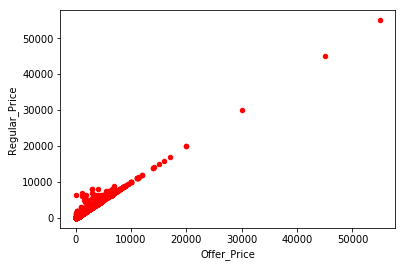

In [0]:
df_cleaned.plot(kind='scatter',x='Offer_Price',y='Regular_Price',color='red')

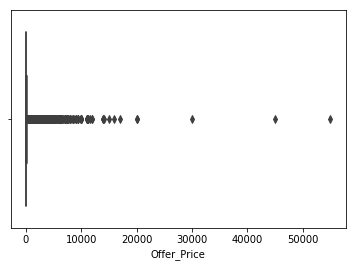

In [0]:
sns.boxplot(x=df_cleaned['Offer_Price'])

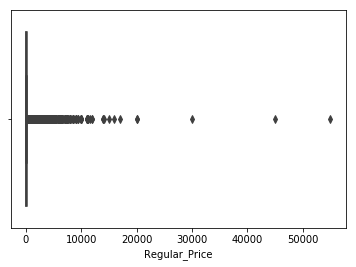

In [0]:
sns.boxplot(x=df_cleaned['Regular_Price'])

In [0]:
df_cleaned.describe()

,sno,Offer_Price,Regular_Price
count,218707.000000,218707.000000,218707.000000
mean,111394.840234,102.487921,120.819759
std,63663.696776,336.361434,349.545431
min,20.000000,0.900000,0.900000
25%,56324.500000,29.950000,34.950000
50%,111184.000000,52.400000,65.000000
75%,166664.500000,99.950000,129.000000
max,221454.000000,54995.000000,54995.000000


In [0]:
print("99th percentile of Regular_price : ", np.percentile(df_cleaned['Regular_Price'],99))
print("99th percentile of Offer_price ", np.percentile(df_cleaned['Offer_Price'],99)) 

99th percentile of Regular_price :  748.95
99th percentile of Offer_price  679.95


In [0]:
df_cleaned = df_cleaned[df_cleaned['Offer_Price']<= np.percentile(df_cleaned['Offer_Price'],99)]
df_cleaned = df_cleaned[df_cleaned['Regular_Price']<=np.percentile(df_cleaned['Regular_Price'],99)]

In [0]:
df_cleaned.shape

(214495, 18)

*    As we see that there are many value which are outlier. there are 4212 value which are greater then 99 percentile

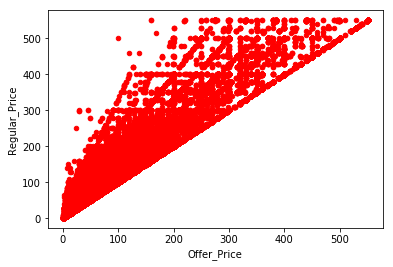

In [0]:
df_cleaned.plot(kind='scatter',x='Offer_Price',y='Regular_Price',color='red')

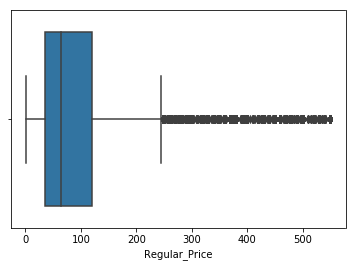

In [0]:
sns.boxplot(x=df_cleaned['Regular_Price'])

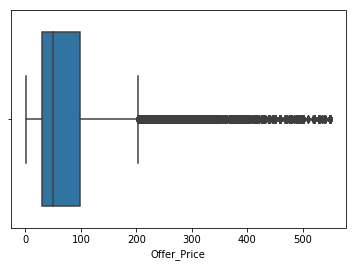

In [0]:
sns.boxplot(x=df_cleaned['Offer_Price'])

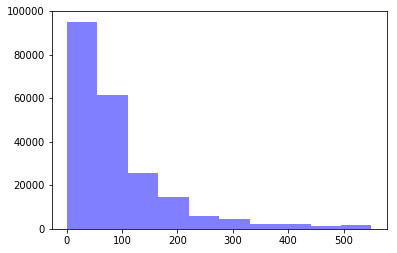

In [0]:
plt.hist(df_cleaned['Regular_Price'], facecolor='blue', alpha=0.5)
plt.show()

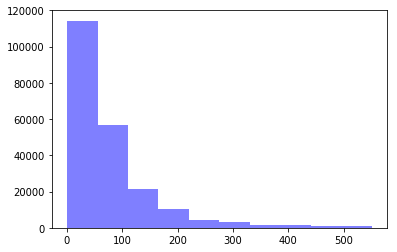

In [0]:
plt.hist(df_cleaned['Offer_Price'], facecolor='blue', alpha=0.5)
plt.show()

#### Conclusion

*    The maximum Offer price 54995 EUR which is outlier as we see in graph.
*    Appox 110,000 amount of data has price less than 50 EUR and very less amount of data has price greater or equal to 500 EUR.
*    99th percentile of Offer price   is  679.95. and 99th percentile of Regular price is 748.95. that mean that the product price range is not more then 800 as per the data.